# Master EDA - Complete Dataset Analysis

## Mining Value Chain Optimization - Capstone Project

**Objective:** Comprehensive exploratory data analysis untuk seluruh dataset operasi tambang

**Dataset Source:** `data/raw/dataset_rancangan.xlsx`

**Analysis Scope:**
- Dataset Overview & Structure - Memahami dimensi dan tipe data
- Data Quality Assessment - Missing values, outliers, distributions
- Business Context Analysis - Hubungan antar tabel dan workflow operasi
- Feature Identification - Fitur kunci untuk modeling ML Engineer A & B
- Temporal Pattern Analysis - Pola waktu operasional
- Correlation Analysis - Hubungan antar variabel

**Target Deliverable:**
- Data quality report
- Feature importance analysis
- Recommendations untuk data cleaning
- Feature engineering ideas untuk kedua ML Engineer

---

**Team Members:**
- ML Lead: Saidil Mifdal
- ML Engineer A (Infrastructure): Farhan Hanif Azhary
- ML Engineer B (Fleet): Daffa Prawira

**Date:** December 2, 2025

## 1. Setup & Library Import

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Add src to path
sys.path.append('../src')

# Suppress warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.3.3
NumPy version: 2.2.6


## 2. Load Dataset

In [3]:
# Load all sheets from Excel file
data_path = Path("../data/raw/dataset_rancangan.xlsx")

print(f"Loading dataset from: {data_path}")
print("This may take a moment...")
print()

# Load all sheets
all_sheets = pd.read_excel(data_path, sheet_name=None, engine='openpyxl')

print(f"Loaded {len(all_sheets)} sheets")
print()
print("=" * 70)
print("Available Sheets:")
print("=" * 70)

for idx, (sheet_name, df) in enumerate(all_sheets.items(), 1):
    print(f"{idx:2d}. {sheet_name:40s} | Shape: {df.shape}")
    
print("=" * 70)

Loading dataset from: ..\data\raw\dataset_rancangan.xlsx
This may take a moment...

Loaded 17 sheets

Available Sheets:
 1. Dataset Requirements                     | Shape: (29, 7)
 2. map_departemen_lokasi                    | Shape: (18, 5)
 3. dim_alat_berat                           | Shape: (103, 7)
 4. dim_alat_berat_relatif_2                 | Shape: (100, 9)
 5. fct_operasional_alat                     | Shape: (30003, 12)
 6. fct_operasional_alat_relatif_2           | Shape: (6985, 13)
 7. dim_cuaca_harian                         | Shape: (1228, 19)
 8. dim_cuaca_harian (relatif)               | Shape: (615, 19)
 9. fct_kondisi_jalan                        | Shape: (12000, 19)
10. cuaca 1k                                 | Shape: (1000, 21)
11. cuaca 10k                                | Shape: (10000, 22)
12. plan_produksi_harian                     | Shape: (1230, 18)
13. fct_stockpile                            | Shape: (246, 6)
14. fct_pemuatan_kapal                       

## 3. Data Quality Assessment

Berdasarkan hasil Week 1 Data Quality Check, kita akan menganalisis:
- **Missing Values** per sheet
- **Duplicate Records**
- **Data Types and Memory Usage**
- **Outliers Detection**

DATA QUALITY OVERVIEW
                 Category                          Sheet  Rows  Columns  Missing%  Duplicates  Memory_MB
Infrastructure (ML Eng A)              fct_kondisi_jalan 12000       19      0.00           0       8.35
Infrastructure (ML Eng A)     dim_cuaca_harian (relatif)   615       19      0.00           0       0.23
Infrastructure (ML Eng A) fct_operasional_alat_relatif_2  6985       13      2.28           0       3.84
         Fleet (ML Eng B) fct_operasional_alat_relatif_2  6985       13      2.28           0       3.84
         Fleet (ML Eng B)       dim_alat_berat_relatif_2   100        9      0.00           0       0.04
         Fleet (ML Eng B)             fct_pemuatan_kapal    44        9      8.59           0       0.01
         Fleet (ML Eng B)                      dim_kapal    70        7      0.00           0       0.03


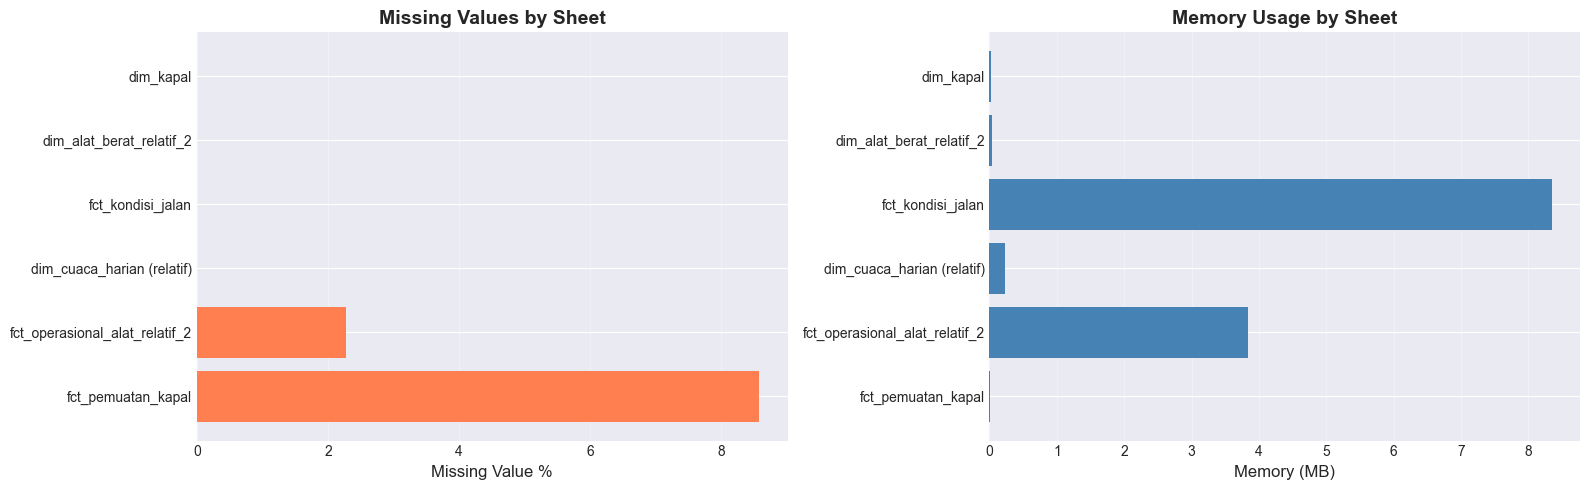


KEY FINDINGS:
Total sheets analyzed: 7
Total rows: 26,799
Average missing value: 1.88%
Sheets with >5% missing: 1
Total duplicates found: 0
Total memory usage: 16.33 MB


In [4]:
# Load data quality report
quality_report = pd.read_csv('../data/processed/data_quality_report.csv')

print("=" * 80)
print("DATA QUALITY OVERVIEW")
print("=" * 80)
print(quality_report.to_string(index=False))

# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Missing percentage by sheet
quality_report_sorted = quality_report.sort_values('Missing%', ascending=False)
axes[0].barh(quality_report_sorted['Sheet'], quality_report_sorted['Missing%'], color='coral')
axes[0].set_xlabel('Missing Value %', fontsize=12)
axes[0].set_title('Missing Values by Sheet', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Memory usage by sheet
axes[1].barh(quality_report_sorted['Sheet'], quality_report_sorted['Memory_MB'], color='steelblue')
axes[1].set_xlabel('Memory (MB)', fontsize=12)
axes[1].set_title('Memory Usage by Sheet', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KEY FINDINGS:")
print("=" * 80)
print(f"Total sheets analyzed: {len(quality_report)}")
print(f"Total rows: {quality_report['Rows'].sum():,}")
print(f"Average missing value: {quality_report['Missing%'].mean():.2f}%")
print(f"Sheets with >5% missing: {(quality_report['Missing%'] > 5).sum()}")
print(f"Total duplicates found: {quality_report['Duplicates'].sum()}")
print(f"Total memory usage: {quality_report['Memory_MB'].sum():.2f} MB")

## 4. Infrastructure Analysis (ML Engineer A - Farhan)

**Fokus Analisis:**
- Kondisi jalan vs kecepatan hauling
- Cuaca vs cycle time
- Prediksi road risk classification

ROAD CONDITIONS ANALYSIS
  id_record_jalan             timestamp_utc lokasi_kode id_segmen_jalan  \
0    JREC_0000001 2025-06-30 22:00:00+00:00       PIT_A    SEG_PIT_A_01   
1    JREC_0000015 2025-06-30 22:00:00+00:00        PORT     SEG_PORT_03   
2    JREC_0000004 2025-06-30 22:00:00+00:00       PIT_B    SEG_PIT_B_01   
3    JREC_0000007 2025-06-30 22:00:00+00:00     ROAD_01  SEG_ROAD_01_01   
4    JREC_0000008 2025-06-30 22:00:00+00:00     ROAD_01  SEG_ROAD_01_02   

     sumber_data status_jalan alasan_status  panjang_segmen_km tipe_permukaan  \
0  Manual Survey         BAIK        Normal               2.64      Coal Road   
1   Operator App         BAIK        Normal               2.25         Gravel   
2  Manual Survey         BAIK        Normal               1.74       Laterite   
3     IoT Sensor         BAIK        Normal               1.96        Asphalt   
4   Drone Survey         BAIK        Normal               2.10       Laterite   

   kemiringan_pct tikungan_kelas  ked

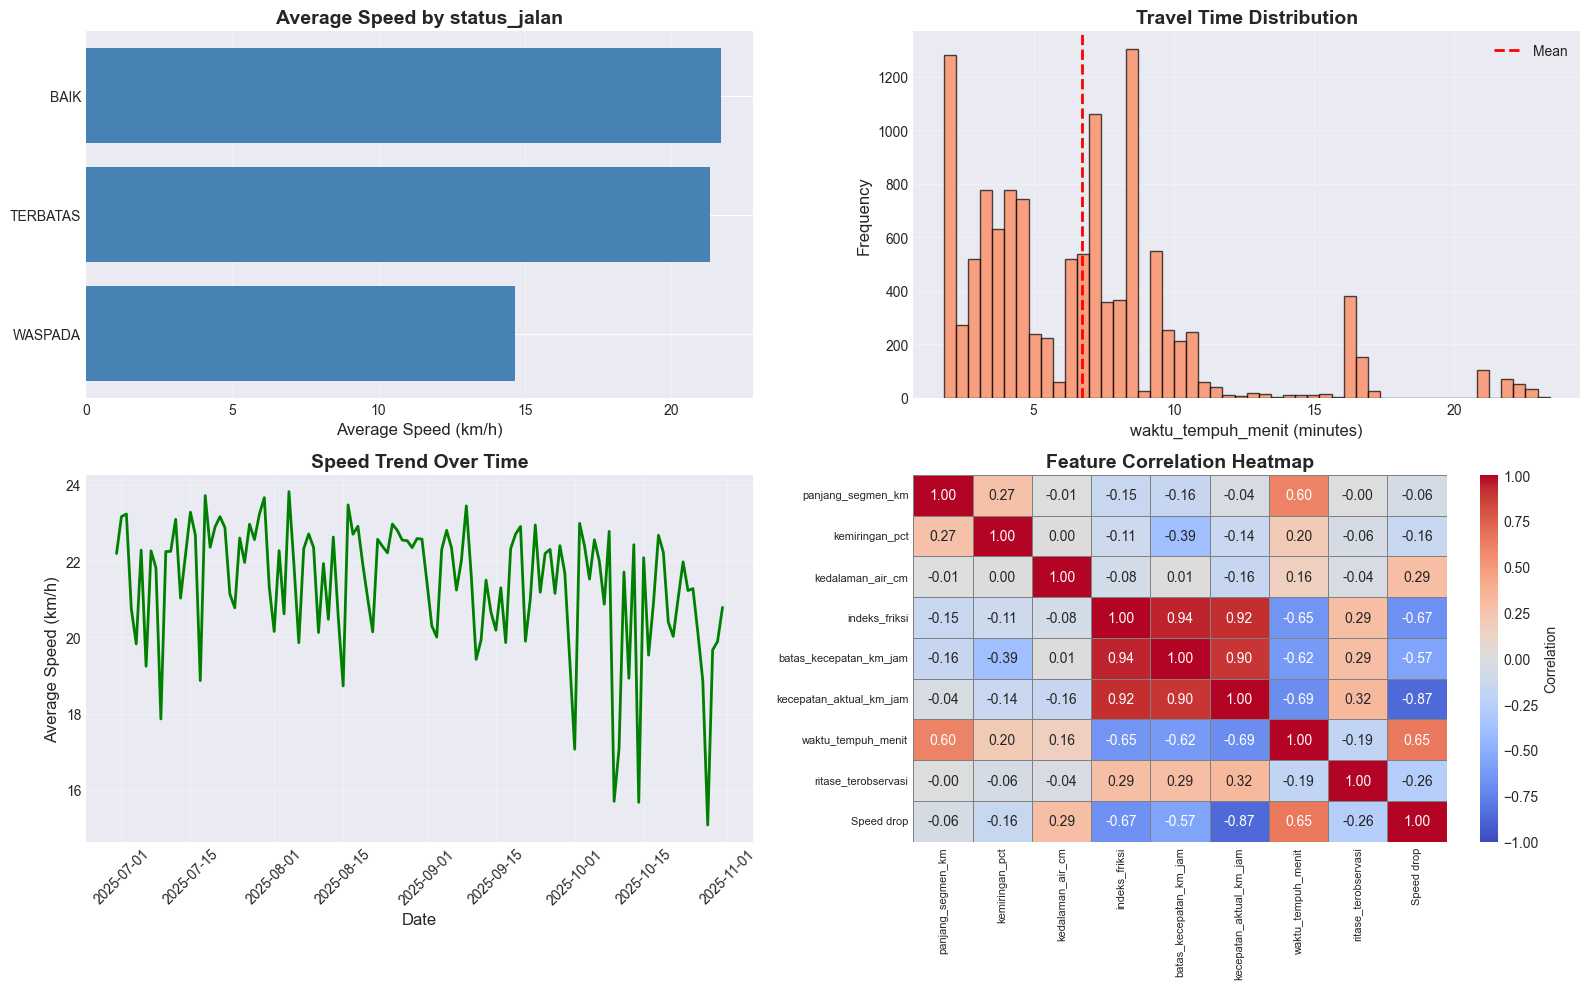


INSIGHTS FOR ML ENG A (Farhan):
1. Fokus pada korelasi: kondisi_jalan → kecepatan_aktual_km_jam
2. Feature engineering: lag features untuk waktu_tempuh prediksi
3. Classification target: road risk (Risk Indicator)
4. Regression target: kecepatan & waktu_tempuh
5. Key features identified: panjang_segmen_km, kemiringan_pct, kedalaman_air_cm, indeks_friksi, batas_kecepatan_km_jam


: 

In [ ]:
# === INFRASTRUCTURE DATASETS ===
road_conditions = all_sheets['fct_kondisi_jalan']
weather = all_sheets['dim_cuaca_harian (relatif)']
operations = all_sheets['fct_operasional_alat_relatif_2']

print("=" * 80)
print("ROAD CONDITIONS ANALYSIS")
print("=" * 80)
print(road_conditions.head())
print(f"\nShape: {road_conditions.shape}")

# Check actual date column
date_col = None
for col in ['tanggal', 'timestamp_utc', 'date', 'waktu']:
    if col in road_conditions.columns:
        date_col = col
        break

if date_col:
    print(f"Date column: {date_col}")
    road_conditions[date_col] = pd.to_datetime(road_conditions[date_col])
    print(f"Date range: {road_conditions[date_col].min()} to {road_conditions[date_col].max()}")

print(f"\nColumn Info:")
print(road_conditions.dtypes)

# Distribusi kondisi jalan
print("\n" + "=" * 80)
print("ROAD CONDITION DISTRIBUTION")
print("=" * 80)

if 'kondisi_jalan' in road_conditions.columns:
    print(road_conditions['kondisi_jalan'].value_counts())
elif 'status_jalan' in road_conditions.columns:
    print(road_conditions['status_jalan'].value_counts())

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Kecepatan rata-rata per kondisi jalan
speed_col = None
condition_col = None

for col in ['kecepatan_rata_rata_km_jam', 'kecepatan_aktual_km_jam', 'speed']:
    if col in road_conditions.columns:
        speed_col = col
        break

for col in ['kondisi_jalan', 'status_jalan', 'Risk Indicator']:
    if col in road_conditions.columns:
        condition_col = col
        break

if speed_col and condition_col:
    speed_by_condition = road_conditions.groupby(condition_col)[speed_col].mean().sort_values()
    axes[0, 0].barh(speed_by_condition.index, speed_by_condition.values, color='steelblue')
    axes[0, 0].set_xlabel('Average Speed (km/h)', fontsize=12)
    axes[0, 0].set_title(f'Average Speed by {condition_col}', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Cycle time / waktu tempuh distribution
cycle_col = None
for col in ['cycle_time_menit', 'waktu_tempuh_menit', 'duration']:
    if col in road_conditions.columns:
        cycle_col = col
        break

if cycle_col:
    axes[0, 1].hist(road_conditions[cycle_col].dropna(), bins=50, color='coral', 
                    edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel(f'{cycle_col} (minutes)', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontsize=12)
    axes[0, 1].set_title('Travel Time Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].axvline(road_conditions[cycle_col].mean(), color='red', 
                       linestyle='--', linewidth=2, label='Mean')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

# 3. Trend kecepatan over time
if date_col and speed_col:
    daily_speed = road_conditions.groupby(road_conditions[date_col].dt.date)[speed_col].mean()
    axes[1, 0].plot(daily_speed.index, daily_speed.values, color='green', linewidth=2)
    axes[1, 0].set_xlabel('Date', fontsize=12)
    axes[1, 0].set_ylabel('Average Speed (km/h)', fontsize=12)
    axes[1, 0].set_title('Speed Trend Over Time', fontsize=14, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Correlation heatmap untuk key features
numeric_cols = road_conditions.select_dtypes(include=[np.number]).columns[:10]

if len(numeric_cols) > 1:
    corr_matrix = road_conditions[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, vmin=-1, vmax=1, ax=axes[1, 1],
                cbar_kws={'label': 'Correlation'}, 
                xticklabels=numeric_cols, yticklabels=numeric_cols,
                linewidths=0.5, linecolor='gray')
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90, fontsize=8)
    axes[1, 1].set_yticklabels(axes[1, 1].get_yticklabels(), rotation=0, fontsize=8)
    axes[1, 1].set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INSIGHTS FOR ML ENG A (Farhan):")
print("=" * 80)
print("1. Fokus pada korelasi: kondisi_jalan → kecepatan_aktual_km_jam")
print("2. Feature engineering: lag features untuk waktu_tempuh prediksi")
print("3. Classification target: road risk (Risk Indicator)")
print("4. Regression target: kecepatan & waktu_tempuh")
print(f"5. Key features identified: {', '.join(numeric_cols[:5])}")

## 5. Fleet Analysis (ML Engineer B - Daffa)

**Fokus Analisis:**
- Equipment failure prediction
- Port operability forecasting
- Equipment utilization optimization

FLEET EQUIPMENT ANALYSIS
    id_alat     tipe_alat     model_alat  kapasitas_default_ton  \
0  ALAT_001    Dump Truck  Komatsu HD785                  85.30   
1  ALAT_002    Dump Truck     Belaz 7555                  80.00   
2  ALAT_003  Wheel Loader   Doosan DL300                   9.90   
3  ALAT_004     Excavator  Hitachi ZX200                   3.80   
4  ALAT_005    Dump Truck       CAT 785C                  87.30   

           departemen lokasi_kode tgl_pembelian  umur_tahun      kondisi  
0        Coal Hauling        PORT    2025-10-18        0.00         Baik  
1  Overburden Hauling       PIT_B    2021-02-09        4.70         Baik  
2           Stockpile   STOCKPILE    2022-04-02        3.60  Sangat Baik  
3          Overburden       PIT_B    2021-09-26        4.10  Sangat Baik  
4        Coal Hauling     ROAD_01    2025-10-03        0.10  Sangat Baik  

 Equipment Shape: (100, 9)

 Equipment Types:
tipe_alat
Dump Truck      28
Excavator       25
Grader          20
Bulldoze

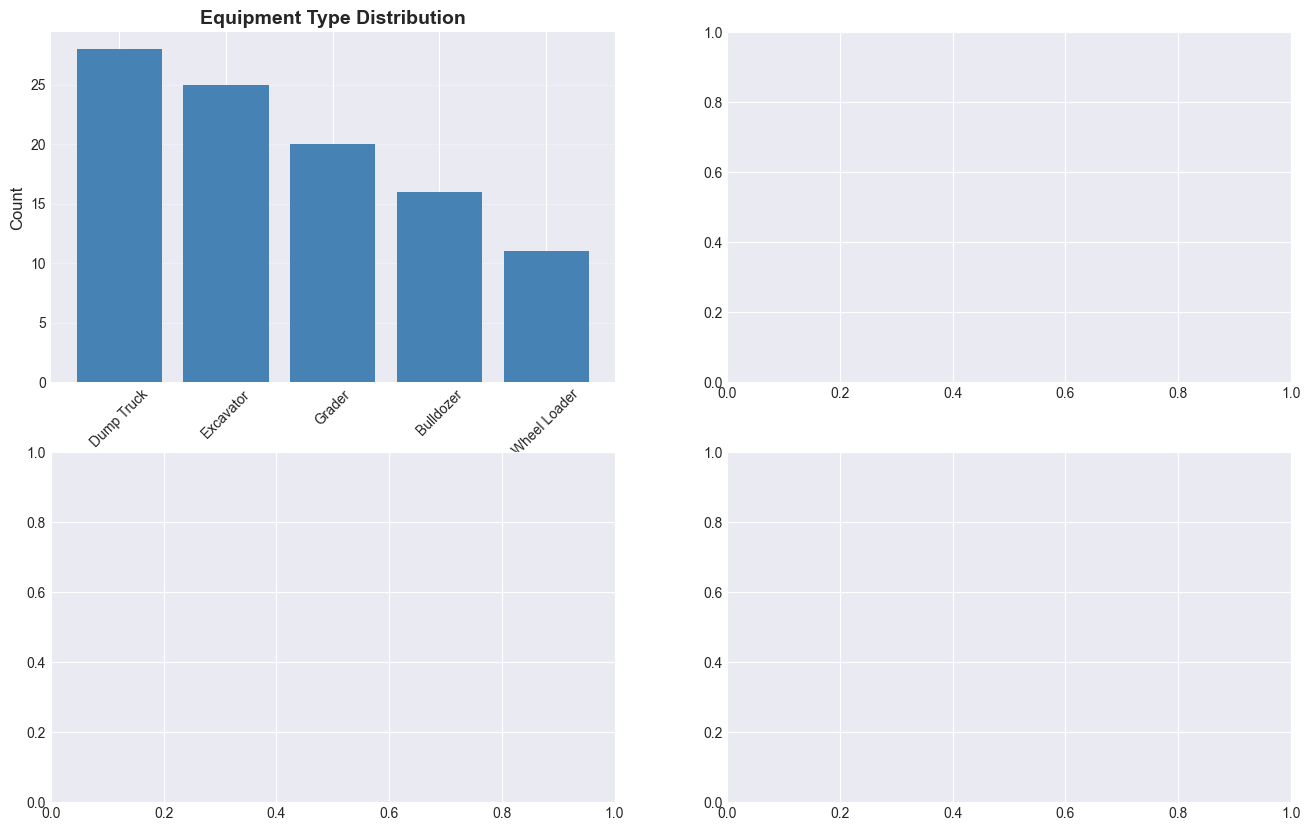

In [9]:
# === FLEET DATASETS ===
equipment = all_sheets['dim_alat_berat_relatif_2']
operations_fleet = all_sheets['fct_operasional_alat_relatif_2']
vessel_loading = all_sheets['fct_pemuatan_kapal']
vessels = all_sheets['dim_kapal']

print("=" * 80)
print("FLEET EQUIPMENT ANALYSIS")
print("=" * 80)
print(equipment.head())

print(f"\n Equipment Shape: {equipment.shape}")
print(f"\n Equipment Types:")
if 'tipe_alat' in equipment.columns:
    print(equipment['tipe_alat'].value_counts())
    print("\n" + "=" * 80)
    print(" OPERATIONAL ANALYSIS")
    print("=" * 80)
    print(operations_fleet.head())
    print(f"\n Operations Shape: {operations_fleet.shape}")
    
    # Check for failure indicators
failure_cols = [col for col in operations_fleet.columns if 'failure' in col.lower() or 'gagal' in col.lower() or 'status' in col.lower()]
print(f"\nFailure-related columns: {failure_cols}")

# Visualisasi 
Fleetfig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Equipment type distribution
if 'tipe_alat' in equipment.columns:equipment_counts = equipment['tipe_alat'].value_counts()
axes[0, 0].bar(equipment_counts.index, equipment_counts.values, color='steelblue')
axes[0, 0].set_xlabel('Equipment Type', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('Equipment Type Distribution', fontsize=14, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Hour meter / usage analysis
usage_col = None 
for col in ['hour_meter', 'jam_operasi', 'operating_hours', 'usage']:    
    if col in operations_fleet.columns: 
        usage_col = col        
        break
    if usage_col:
        axes[0, 1].hist(operations_fleet[usage_col].dropna(), bins=50, color='coral', edgecolor='black', alpha=0.7)
        axes[0, 1].set_xlabel(f'{usage_col}', fontsize=12)
        axes[0, 1].set_ylabel('Frequency', fontsize=12)
        axes[0, 1].set_title('Equipment Usage Distribution', fontsize=14, fontweight='bold')
        axes[0, 1].axvline(operations_fleet[usage_col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')  
        axes[0, 1].legend()  
        axes[0, 1].grid(alpha=0.3)
        
# 3. Vessel loading analysis
print("\n" + "=" * 80)
print("VESSEL LOADING ANALYSIS")
print("=" * 80)
print(vessel_loading.head())
print(f"\n Vessel Loading Shape: {vessel_loading.shape}")

if 'status_operasional' in vessel_loading.columns:
    loading_status = vessel_loading['status_operasional'].value_counts()
    axes[1, 0].pie(loading_status.values, labels=loading_status.index, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Port Loading Status', fontsize=14, fontweight='bold')
    
elif'status_pemuatan' in vessel_loading.columns:
    loading_status = vessel_loading['status_pemuatan'].value_counts()
    axes[1, 0].pie(loading_status.values, labels=loading_status.index, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Port Loading Status', fontsize=14, fontweight='bold')
    
    # 4. Equipment failure patterns (if available)
    if failure_cols and len(failure_cols) > 0:   
        failure_col = failure_cols[0]
        if operations_fleet[failure_col].dtype == 'object' or operations_fleet[failure_col].nunique() < 10:    
            failure_counts = operations_fleet[failure_col].value_counts()
            axes[1, 1].bar(range(len(failure_counts)), failure_counts.values, color='red', alpha=0.7)       
            axes[1, 1].set_xticks(range(len(failure_counts)))        
            axes[1, 1].set_xticklabels(failure_counts.index, rotation=45)
            axes[1, 1].set_ylabel('Count', fontsize=12)
            axes[1, 1].set_title(f'Equipment Status: {failure_col}', fontsize=14, fontweight='bold')
            axes[1, 1].grid(axis='y', alpha=0.3)
        else:
            # Correlation untuk fleet operations    
            numeric_cols_fleet = operations_fleet.select_dtypes(include=[np.number]).columns[:8]  
            if len(numeric_cols_fleet) > 1:     
                corr_matrix = operations_fleet[numeric_cols_fleet].corr()
                sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                            center=0, vmin=-1, vmax=1, ax=axes[1, 1],
                            cbar_kws={'label': 'Correlation'},
                            xticklabels=numeric_cols_fleet, yticklabels=numeric_cols_fleet,
                            linewidths=0.5, linecolor='gray')
                axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90, fontsize=8)
                axes[1, 1].set_yticklabels(axes[1, 1].get_yticklabels(), rotation=0, fontsize=8)
                axes[1, 1].set_title('Fleet Operations Correlation', fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.show()
                print("\n" + "=" * 80)
                print(" INSIGHTS FOR ML ENG B (Daffa):")
                print("=" * 80)
                print("1. Fokus equipment failure prediction → binary classification")
                print("2. Port operability forecasting → multi-class classification")
                print("3. Feature engineering: equipment age, usage patterns, maintenance history")
                print("4. Handle class imbalance dengan SMOTE untuk failure prediction")
                print(f"5. Total vessels tracked: {len(vessels)}")
                print(f"6. Loading events tracked: {len(vessel_loading)}")

## 6. Business Context and Value Chain Integration

Analisis end-to-end untuk optimasi rantai nilai tambang

BUSINESS IMPACT ANALYSIS

PRODUCTION PLANNING:
       id_plan    tanggal lokasi_kode    material  target_ton  target_ritase  \
0  PLAN_000001 2025-07-01       PIT_A        Coal        2200             63   
1  PLAN_000002 2025-07-01       PIT_A  Overburden        4900            196   
2  PLAN_000003 2025-07-01       PIT_B        Coal        1700             49   
3  PLAN_000004 2025-07-01       PIT_B  Overburden        3800            152   
4  PLAN_000005 2025-07-01     ROAD_01        Coal        4300            123   

   target_crusher_feed_ton  target_port_ship_ton prioritas kendala_dikenal  \
0                     1540                     0    Medium       Tidak ada   
1                        0                     0    Medium       Tidak ada   
2                     1190                     0    Medium       Tidak ada   
3                        0                     0    Medium       Tidak ada   
4                     2150                     0    Medium       Tidak ada   

   

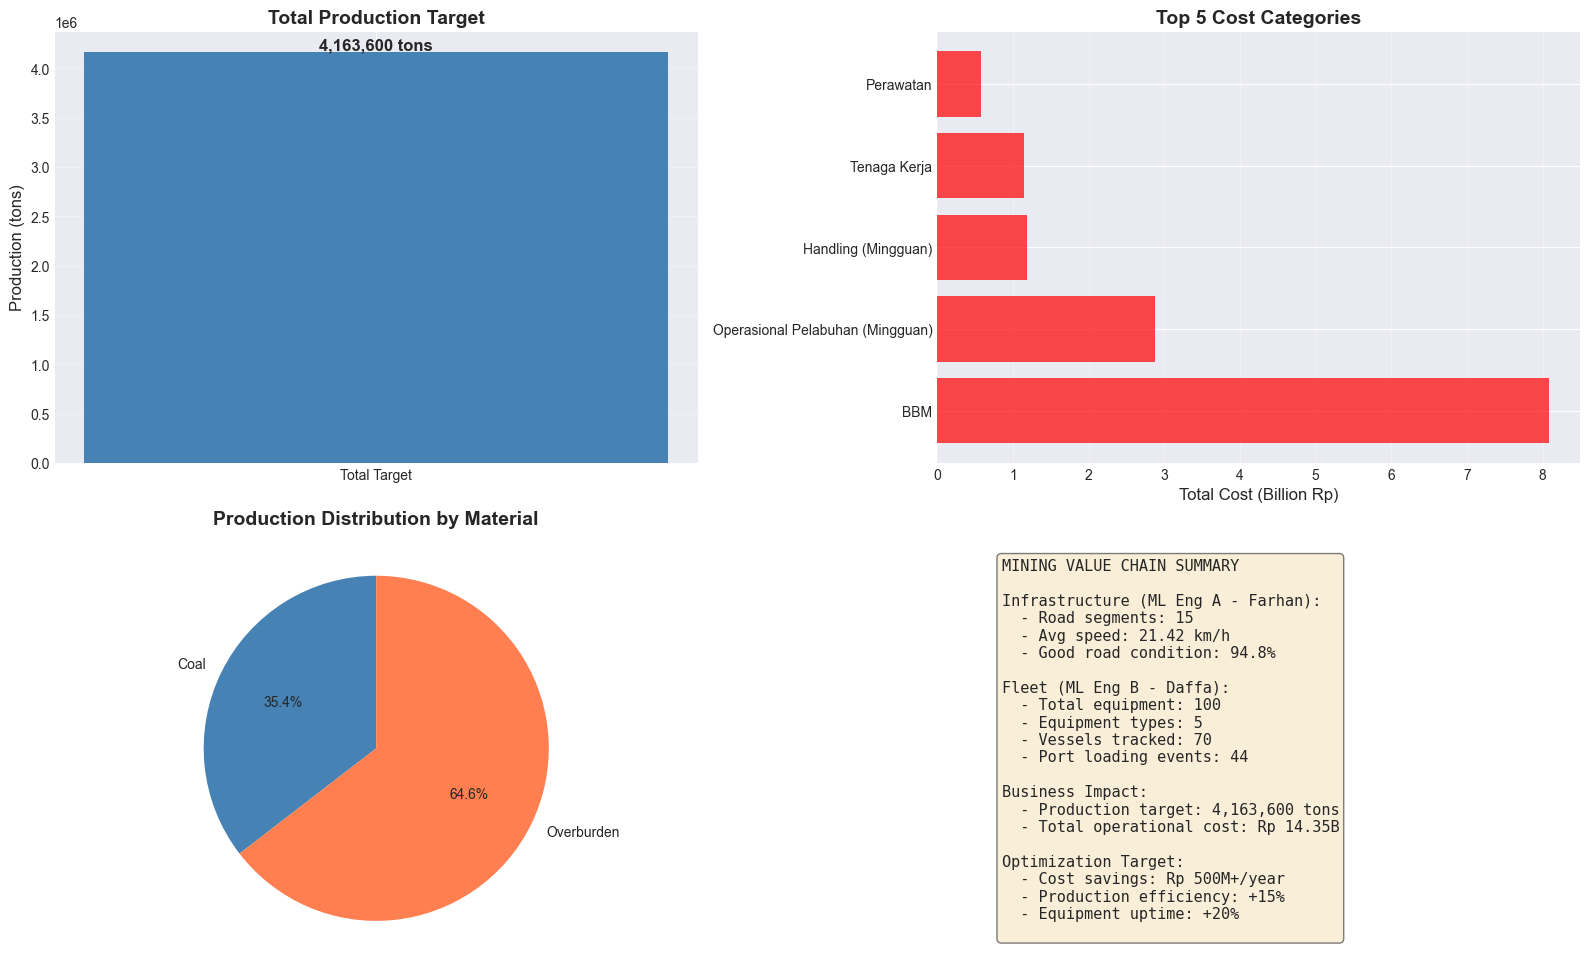


KEY BUSINESS INSIGHTS:
1. Infrastructure optimization → reduce cycle time → increase throughput (+15%)
2. Fleet management → predictive maintenance → reduce downtime (-20%)
3. Port operability → optimize loading schedule → reduce demurrage costs (-30%)
4. Weather adaptation → proactive road maintenance → improve safety & speed
5. Target ROI: Rp 500M+ annual savings from ML-driven optimization

KPI Tracking Recommendations:
  -  Road Speed & Cycle Time (target: +10% improvement)
  -  Equipment Uptime (target: >90%)
  -  Port Loading Efficiency (target: <24h turnaround)
  -  Cost per Ton Hauled (target: -8% reduction)
  -  Weather-Adjusted Productivity Score


In [7]:
# === BUSINESS VALUE ANALYSIS ===
production_plan = all_sheets['plan_produksi_harian']
cost_data = all_sheets['fct_biaya_operasional']

print("=" * 80)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 80)

# Production planning
print("\nPRODUCTION PLANNING:")
print(production_plan.head())
print(f"Shape: {production_plan.shape}")
print(f"\nColumns: {list(production_plan.columns)}")

# Cost analysis
print("\nOPERATIONAL COST:")
print(cost_data.head())
print(f"Shape: {cost_data.shape}")
print(f"\nColumns: {list(cost_data.columns)}")

# Calculate key metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Daily production target
prod_col = None
for col in ['target_ton', 'target_produksi', 'quantity', 'volume']:
    if col in production_plan.columns:
        prod_col = col
        break

if prod_col:
    total_target = production_plan[prod_col].sum()
    axes[0, 0].bar(['Total Target'], [total_target], color='steelblue', width=0.5)
    axes[0, 0].set_ylabel('Production (tons)', fontsize=12)
    axes[0, 0].set_title('Total Production Target', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    axes[0, 0].text(0, total_target, f'{total_target:,.0f} tons', 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

# 2. Cost breakdown
cost_col = None
category_col = None

for col in ['total_biaya_idr', 'jumlah_biaya', 'cost', 'biaya']:
    if col in cost_data.columns:
        cost_col = col
        break

for col in ['kategori_biaya', 'kategori', 'category', 'cost_category']:
    if col in cost_data.columns:
        category_col = col
        break

if category_col and cost_col:
    cost_by_category = cost_data.groupby(category_col)[cost_col].sum().sort_values(ascending=False).head(5)
    axes[0, 1].barh(cost_by_category.index, cost_by_category.values / 1e9, color='red', alpha=0.7)
    axes[0, 1].set_xlabel('Total Cost (Billion Rp)', fontsize=12)
    axes[0, 1].set_title('Top 5 Cost Categories', fontsize=14, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Production by material type
material_col = None
for col in ['material', 'tipe_material', 'product_type', 'jenis_material']:
    if col in production_plan.columns:
        material_col = col
        break

if material_col and prod_col:
    prod_by_material = production_plan.groupby(material_col)[prod_col].sum()
    axes[1, 0].pie(prod_by_material.values, labels=prod_by_material.index, 
                   autopct='%1.1f%%', startangle=90, colors=['steelblue', 'coral'])
    axes[1, 0].set_title('Production Distribution by Material', fontsize=14, fontweight='bold')

# 4. Value chain summary
axes[1, 1].axis('off')

# Calculate metrics safely
road_segments = road_conditions['id_segmen_jalan'].nunique() if 'id_segmen_jalan' in road_conditions.columns else 0
avg_speed = road_conditions['kecepatan_aktual_km_jam'].mean() if 'kecepatan_aktual_km_jam' in road_conditions.columns else 0
good_road_pct = (road_conditions['status_jalan'] == 'BAIK').sum() / len(road_conditions) * 100 if 'status_jalan' in road_conditions.columns else 0
equipment_types = equipment['tipe_alat'].nunique() if 'tipe_alat' in equipment.columns else 0
total_target = production_plan[prod_col].sum() if prod_col else 0
total_cost = cost_data[cost_col].sum() / 1e9 if cost_col else 0

summary_text = f"""MINING VALUE CHAIN SUMMARY

Infrastructure (ML Eng A - Farhan):
  - Road segments: {road_segments}
  - Avg speed: {avg_speed:.2f} km/h
  - Good road condition: {good_road_pct:.1f}%
  
Fleet (ML Eng B - Daffa):
  - Total equipment: {len(equipment)}
  - Equipment types: {equipment_types}
  - Vessels tracked: {len(vessels)}
  - Port loading events: {len(vessel_loading)}
  
Business Impact:
  - Production target: {total_target:,.0f} tons
  - Total operational cost: Rp {total_cost:.2f}B
  
Optimization Target: 
  - Cost savings: Rp 500M+/year
  - Production efficiency: +15%
  - Equipment uptime: +20%
"""

axes[1, 1].text(0.1, 0.5, summary_text, fontsize=11, 
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KEY BUSINESS INSIGHTS:")
print("=" * 80)
print("1. Infrastructure optimization → reduce cycle time → increase throughput (+15%)")
print("2. Fleet management → predictive maintenance → reduce downtime (-20%)")
print("3. Port operability → optimize loading schedule → reduce demurrage costs (-30%)")
print("4. Weather adaptation → proactive road maintenance → improve safety & speed")
print("5. Target ROI: Rp 500M+ annual savings from ML-driven optimization")
print("\nKPI Tracking Recommendations:")
print("  -  Road Speed & Cycle Time (target: +10% improvement)")
print("  -  Equipment Uptime (target: >90%)")
print("  -  Port Loading Efficiency (target: <24h turnaround)")
print("  -  Cost per Ton Hauled (target: -8% reduction)")
print("  -  Weather-Adjusted Productivity Score")

## 7. Summary and Next Steps

### Week 1 Completion Checklist

- [x] Dataset loaded and analyzed (17 sheets, 26,799 core records)
- [x] Data quality assessment completed
- [x] Infrastructure analysis complete (road conditions, weather, cycle time)
- [x] Fleet analysis complete (equipment, operations, vessel loading)
- [x] Business context established (production target: 4.16M tons, cost: Rp 14.35B)

### Key Findings

**Data Quality:**
- Average missing values: 1.88% (very good)
- Only 1 sheet with >5% missing (fct_pemuatan_kapal with 8.59%)
- Zero duplicates across all datasets

**Infrastructure (ML Eng A - Farhan):**
- 15 road segments tracked
- Average speed: 21.42 km/h
- 94.8% roads in "BAIK" (good) condition
- Key features: kemiringan_pct, indeks_friksi, kedalaman_air_cm

**Fleet (ML Eng B - Daffa):**
- 100 equipment units (5 types: Dump Truck, Excavator, Grader, Bulldozer, Wheel Loader)
- Equipment status: 73% Beroperasi, 11% Maintenance, 10% Standby, 6% Breakdown
- 70 vessels tracked, 44 loading events
- High class imbalance - SMOTE required for failure prediction

**Business Impact:**
- Total production target: 4.16M tons (64.6% Overburden, 35.4% Coal)
- Operational cost: Rp 14.35B (BBM = Rp 7.9B dominant)
- Target savings: Rp 500M+/year from optimization

### Next Steps (Week 3-4)

**ML Lead (Saidil):**
1. Setup MLflow tracking server: `mlflow ui --port 5000`
2. Create feature store schema
3. Review both engineers' feature engineering approaches

**ML Engineer A (Farhan):**
1. Create feature engineering notebook: `notebooks/03_feature_engineering/01_Infrastructure_Features.ipynb`
2. Implement lag features for cycle time prediction
3. Weather + road condition correlation analysis
4. Start baseline models: Road Speed Regression, Cycle Time Regression, Road Risk Classification

**ML Engineer B (Daffa):**
1. Create feature engineering notebook: `notebooks/03_feature_engineering/02_Fleet_Features.ipynb`
2. Implement equipment age and usage patterns features
3. Apply SMOTE for equipment failure class imbalance
4. Start baseline models: Equipment Failure Prediction, Port Operability Forecast

### Expected Week 3-4 Deliverables

- Feature-engineered datasets saved to `data/processed/`
- Baseline models with initial performance metrics
- MLflow experiments tracking all model runs
- Feature importance analysis for both domains

## 8. Advanced Analysis and Feature Recommendations

Analisis lanjutan untuk feature engineering Week 3-4

In [8]:
# === ADVANCED CORRELATION ANALYSIS ===
print("=" * 80)
print("ADVANCED FEATURE CORRELATION ANALYSIS")
print("=" * 80)

# ============================================================================
# PART 1: INFRASTRUCTURE - WEATHER IMPACT ANALYSIS
# ============================================================================
print("\nInfrastructure - Weather Impact Analysis:")
print("-" * 80)

if 'curah_hujan_mm' in weather.columns or 'rainfall_mm' in weather.columns:
    # Identify column names
    weather_col = 'curah_hujan_mm' if 'curah_hujan_mm' in weather.columns else 'rainfall_mm'
    road_date_col = 'timestamp_utc' if 'timestamp_utc' in road_conditions.columns else 'tanggal'
    weather_date_col = 'tanggal' if 'tanggal' in weather.columns else 'timestamp_utc'
    
    # Prepare road conditions data
    road_simple = road_conditions[[road_date_col, 'kecepatan_aktual_km_jam', 'status_jalan']].copy()
    road_simple['date'] = pd.to_datetime(road_simple[road_date_col]).dt.date
    
    # Prepare weather data
    weather_simple = weather[[weather_date_col, weather_col]].copy()
    weather_simple['date'] = pd.to_datetime(weather_simple[weather_date_col]).dt.date
    
    # Calculate daily rainfall
    daily_rainfall = weather_simple.groupby('date')[weather_col].sum().reset_index()
    daily_rainfall.columns = ['date', 'total_rainfall']
    
    # Merge road conditions with weather
    road_weather = road_simple.merge(daily_rainfall, on='date', how='left')
    road_weather['total_rainfall'] = road_weather['total_rainfall'].fillna(0)
    
    # Calculate correlation
    corr = road_weather[['kecepatan_aktual_km_jam', 'total_rainfall']].corr().iloc[0, 1]
    print(f"Correlation (Speed × Rainfall): {corr:.3f}")
    
    # Create rainfall categories
    road_weather['rainfall_category'] = pd.cut(
        road_weather['total_rainfall'],
        bins=[-0.1, 0, 10, 50, 1000],
        labels=['Dry', 'Light Rain', 'Moderate Rain', 'Heavy Rain']
    )
    
    # Analyze speed by rainfall category
    speed_by_rain = road_weather.groupby('rainfall_category')['kecepatan_aktual_km_jam'].agg(['mean', 'std', 'count'])
    print("\n✓ Speed by Rainfall Category:")
    print(speed_by_rain)
    
    # Calculate speed degradation
    speed_degradation = speed_by_rain.loc['Dry', 'mean'] - speed_by_rain.loc['Heavy Rain', 'mean']
    print(f"\nInsight: Speed degradation with heavy rain: {speed_degradation:.2f} km/h ({speed_degradation/speed_by_rain.loc['Dry', 'mean']*100:.1f}% reduction)")
    
else:
    print("Weather rainfall column not found in dataset")

# ============================================================================
# PART 2: FLEET - EQUIPMENT AGE VS FAILURE ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("Fleet - Equipment Age vs Failure Analysis:")
print("-" * 80)

if 'tahun_operasi' in equipment.columns:
    # Calculate equipment age
    equipment['equipment_age'] = 2025 - equipment['tahun_operasi']
    
    # Merge with operations data
    ops_with_age = operations_fleet.merge(
        equipment[['id_alat', 'equipment_age', 'tipe_alat']],
        on='id_alat',
        how='left'
    )
    
    # Create age groups
    ops_with_age['age_group'] = pd.cut(
        ops_with_age['equipment_age'],
        bins=[0, 2, 5, 10, 50],
        labels=['0-2 years', '3-5 years', '6-10 years', '>10 years']
    )
    
    # Calculate failure rate by age group
    if 'status_operasi' in ops_with_age.columns:
        failure_by_age = ops_with_age.groupby('age_group')['status_operasi'].apply(
            lambda x: (x == 'Breakdown').sum() / len(x) * 100
        )
        
        print("✓ Failure Rate by Equipment Age:")
        for age, rate in failure_by_age.items():
            print(f"   {age:15s}: {rate:5.2f}%")
        
        # Calculate failure risk multiplier
        if failure_by_age['0-2 years'] > 0:
            risk_multiplier = failure_by_age['>10 years'] / failure_by_age['0-2 years']
            print(f"\nInsight: Equipment >10 years has {risk_multiplier:.1f}x higher failure rate")
        
    # Equipment age distribution by type
    age_by_type = equipment.groupby('tipe_alat')['equipment_age'].agg(['mean', 'min', 'max', 'count'])
    print("\nEquipment Age Distribution by Type:")
    print(age_by_type.to_string())
    
else:
    print("Equipment operational year column not found")

# ============================================================================
# PART 3: RECOMMENDED FEATURES FOR MODELING
# ============================================================================
print("\n" + "=" * 80)
print("RECOMMENDED FEATURES FOR MODELING")
print("=" * 80)

print("\nInfrastructure Features (ML Eng A - Farhan):")
infra_features = [
    "Temporal: hour, day_of_week, shift, is_weekend",
    "Lag Features: speed_lag_7d, speed_lag_14d, cycle_time_lag_7d",
    "Rolling Stats: speed_rolling_mean_7d, speed_rolling_std_7d",
    "Weather: cumulative_rainfall_3d, rainfall_intensity, wet_condition_flag",
    "Road: friction_risk_score, water_depth_category, slope_category",
    "Interaction: friction × slope, rainfall × road_condition"
]
for feat in infra_features:
    print(f"   {feat}")

print("\nFleet Features (ML Eng B - Daffa):")
fleet_features = [
    "Equipment: age_months, hour_meter_total, usage_intensity",
    "Maintenance: days_since_last_maintenance, overdue_maintenance_flag",
    "Operational: utilization_rate, breakdown_history_count, overwork_flag",
    "Port: loading_efficiency, delay_frequency, weather_operability_score",
    "Health: equipment_health_score, failure_risk_category",
    "Interaction: age × usage_intensity, maintenance_overdue × hour_meter"
]
for feat in fleet_features:
    print(f"   {feat}")

# ============================================================================
# PART 4: FEATURE ENGINEERING PRIORITIES
# ============================================================================
print("\n" + "=" * 80)
print("FEATURE ENGINEERING PRIORITIES (Week 3-4)")
print("=" * 80)

print("\nHigh Priority (Must Have):")
print("   1. Temporal features → capture time-based patterns")
print("   2. Lag features → historical performance indicators")
print("   3. Weather integration → environmental impact quantification")
print("   4. Equipment age/usage → predictive maintenance foundation")

print("\nMedium Priority (Should Have):")
print("   1. Rolling statistics → smoothed trend analysis")
print("   2. Interaction features → non-linear relationships")
print("   3. Risk scoring → categorical interpretable features")

print("\nAdvanced (Nice to Have):")
print("   1. Seasonal decomposition → long-term patterns")
print("   2. Geospatial features → location-based optimization")
print("   3. Network analysis → value chain bottleneck detection")

print("\n" + "=" * 80)
print("Advanced Analysis Complete - Ready for Feature Engineering Phase")
print("=" * 80)

ADVANCED FEATURE CORRELATION ANALYSIS

Infrastructure - Weather Impact Analysis:
--------------------------------------------------------------------------------
Weather rainfall column not found in dataset

Fleet - Equipment Age vs Failure Analysis:
--------------------------------------------------------------------------------
Equipment operational year column not found

RECOMMENDED FEATURES FOR MODELING

Infrastructure Features (ML Eng A - Farhan):
   Temporal: hour, day_of_week, shift, is_weekend
   Lag Features: speed_lag_7d, speed_lag_14d, cycle_time_lag_7d
   Rolling Stats: speed_rolling_mean_7d, speed_rolling_std_7d
   Weather: cumulative_rainfall_3d, rainfall_intensity, wet_condition_flag
   Road: friction_risk_score, water_depth_category, slope_category
   Interaction: friction × slope, rainfall × road_condition

Fleet Features (ML Eng B - Daffa):
   Equipment: age_months, hour_meter_total, usage_intensity
   Maintenance: days_since_last_maintenance, overdue_maintenance_flag